## Newton Interpolation

Given a function $f(x)$ sampled at $n+1$ points $x_0, x_1, ...., x_n$, Newton's Interpolation formula generates a 
polynomial $Q_n(x)$ of degree less than or equal to $n$ using the recursive relation 

$$ Q_m(x) = Q_{m-1}(x) + c (x-x_0)(x-x_1)...(x - x_{m-1}) $$

where $Q_{m-1}(x_j) = f(x_{j})$ for $0 \leq j \leq x_{m-1}$ and constant $c$ is determined by demanding that 
$Q_m(x_m) = f(x_m)$. 

This yields 

$$
c = \frac{f(x_m) - Q_{m-1}(x_m)}{\prod_{j=0}^{m-1} (x_m - x_j)} $$

In [1]:
import math
import matplotlib.pyplot as plt   
%matplotlib inline

The following function computes the product $\prod_{j} (x - x_j)$ where the vector $X$ consists of the points 
$x_j$

In [7]:
def Prod(x, X):
    prod = 1.
    for x_i in X:
        prod *= x - x_i
    return prod

Function to compute Newton Interpolant for a function $f$ at point $x$, given the funcion is sampled at 
points $X$

In [8]:
def NewtonInterpolation(f, x, X): 
    n = len(X)
    if n == 1:
        return f(X[0])   
    else:
        xm = X[-1]
        X = X[:-1]
        return NewtonInterpolation(f, x, X) + ((f(xm) - NewtonInterpolation(f, xm, X))/Prod(xm, X)) * Prod(x, X)    

Example: The Exponential Function

In [9]:
def f(V):
    q=1.6*10**-19
    T=300
    k=1.38*10**-23
    return 5*(math.e**(q*V/k*T)-1)

In [11]:
points = [0.1,1,2,3,4,5,6,7,8,9,10,11]
N = 500
#x = [i / 100 for i in range(0, N+1)]
x=[0,0.3,0.4,0.5,0.8,1,1.2,1.3,1.5,1.5,1.7,2]
# polynomial_approximation = []

# for k in x:
#     polynomial_approximation.append(NewtonInterpolation(f, k, points))
polynomial_approximation=[NewtonInterpolation(f, k, points) for k in x]

OverflowError: (34, 'Result too large')

In [12]:
interpolation_values = [f(xi) for xi in points]
real_function = [f(xi) for xi in x]

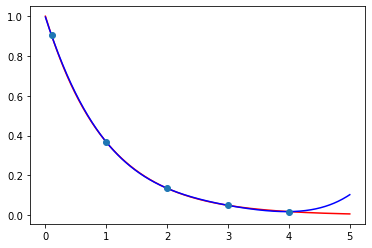

In [13]:
plt.plot(x, real_function, 'r')
plt.plot(x, polynomial_approximation, 'b')
plt.plot(points, interpolation_values, 'o')